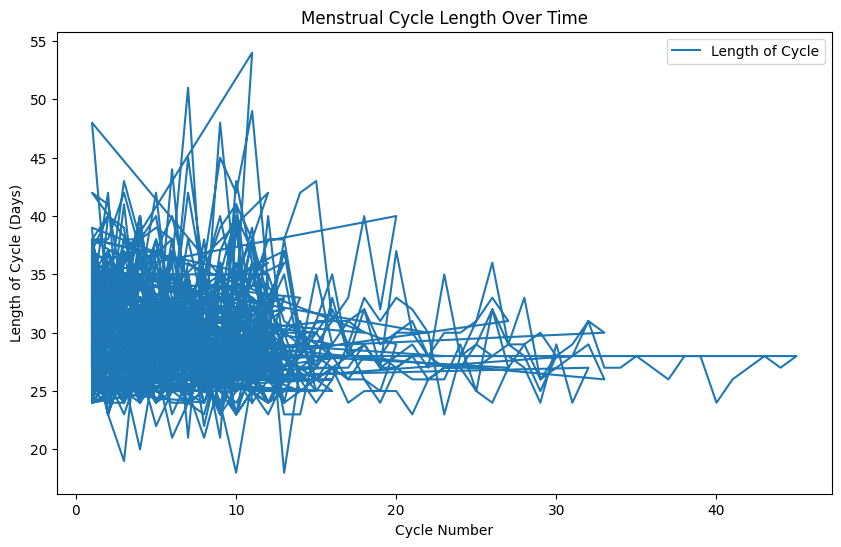

Data is stationary, no differencing needed.


d:\GitHub\floofy\py_backend\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\GitHub\floofy\py_backend\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\GitHub\floofy\py_backend\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          LengthofCycle   No. Observations:                 1332
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3388.649
Date:                Sat, 22 Feb 2025   AIC                           6797.298
Time:                        13:47:38   BIC                           6849.243
Sample:                             0   HQIC                          6816.765
                               - 1332                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        34.0619      1.784     19.094      0.000      30.565      37.558
Age                          -0.1716      0.055     -3.123      0.002      -0.279     

In [17]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load the dataset (replace with the actual path to your dataset)
data = pd.read_csv('dataset/data.csv')

# Prepare the data for ARIMAX model
exog_columns = ['Age', 'BMI', 'UnusualBleeding', 'NumberofDaysofIntercourse', 'Breastfeeding', 'Numberpreg']
filtered_data_updated = data[['CycleNumber', 'LengthofCycle'] + exog_columns].dropna()

# Set 'CycleNumber' as the index
filtered_data_updated.set_index('CycleNumber', inplace=True)

# Ensuring all columns for exog and target variables are numeric
filtered_data_updated[exog_columns] = filtered_data_updated[exog_columns].apply(pd.to_numeric, errors='coerce')
filtered_data_updated['LengthofCycle'] = pd.to_numeric(filtered_data_updated['LengthofCycle'], errors='coerce')

# Fill missing values with the median of each column
filtered_data_updated.fillna(filtered_data_updated.median(), inplace=True)

# Split the data into training and testing sets
train_size = int(len(filtered_data_updated) * 0.8)
train_target, test_target = filtered_data_updated['LengthofCycle'][:train_size], filtered_data_updated['LengthofCycle'][train_size:]
train_exog, test_exog = filtered_data_updated[exog_columns][:train_size], filtered_data_updated[exog_columns][train_size:]

# Plot the data to visually inspect it
plt.figure(figsize=(10, 6))
plt.plot(filtered_data_updated.index, filtered_data_updated['LengthofCycle'], label='Length of Cycle')  # Use the index for x-axis
plt.title('Menstrual Cycle Length Over Time')
plt.xlabel('Cycle Number')
plt.ylabel('Length of Cycle (Days)')
plt.legend()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
adf_test = adfuller(filtered_data_updated['LengthofCycle'])
adf_test_stat, p_value = adf_test[0], adf_test[1]

if p_value > 0.05:
    print("Data is non-stationary, differencing will be applied.")
else:
    print("Data is stationary, no differencing needed.")

# Define the ARIMAX model function
def arimax_model(p, q, exog_train, target_train):
    model = ARIMA(target_train, exog=exog_train, order=(p, 0, q))
    model_fitted = model.fit()
    return model_fitted

# Fit the ARIMAX model with p=1, q=1 (simplified for quicker fitting)
p, q = 1, 1
best_model_simple = arimax_model(p, q, train_exog, train_target)

# Display the summary of the model
print(best_model_simple.summary())

# Save the trained ARIMAX model using pickle
pickle_model_filename = 'arima_menstrual_cycle_model_simple.pkl'
with open(pickle_model_filename, 'wb') as file:
    pickle.dump(best_model_simple, file)

print(f"Model saved to {pickle_model_filename}")